# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [367]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers

In [368]:
#data-loading
dataset = pd.read_csv("Datasets/ionosphere_data.csv")
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [369]:
#missing values
dataset.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [370]:
dataset.shape

(351, 35)

In [371]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
feature2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
feature3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
feature4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
feature5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
feature6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
feature7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
feature8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
feature9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
feature10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


In [372]:
f2 = pd.Series(dataset['feature2'])
f2.unique()

array([0], dtype=int64)

In [373]:
dataset.drop("feature2", inplace=True, axis=1)
dataset.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [374]:
dataset.ndim

2

In [375]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
feature1     351 non-null int64
feature3     351 non-null float64
feature4     351 non-null float64
feature5     351 non-null float64
feature6     351 non-null float64
feature7     351 non-null float64
feature8     351 non-null float64
feature9     351 non-null float64
feature10    351 non-null float64
feature11    351 non-null float64
feature12    351 non-null float64
feature13    351 non-null float64
feature14    351 non-null float64
feature15    351 non-null float64
feature16    351 non-null float64
feature17    351 non-null float64
feature18    351 non-null float64
feature19    351 non-null float64
feature20    351 non-null float64
feature21    351 non-null float64
feature22    351 non-null float64
feature23    351 non-null float64
feature24    351 non-null float64
feature25    351 non-null float64
feature26    351 non-null float64
feature27    351 non-null float64
feature28    

feature1


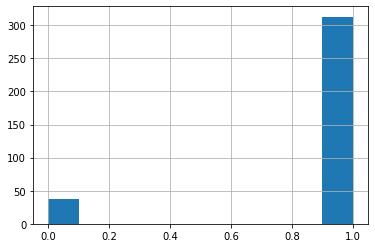

feature3


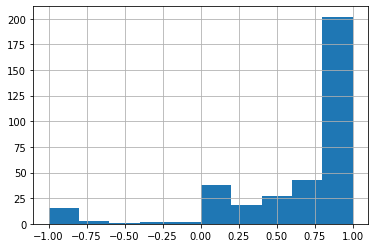

feature4


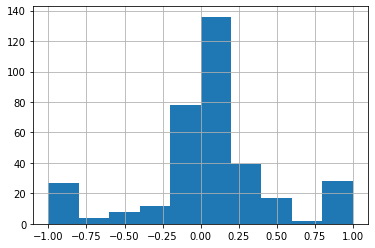

feature5


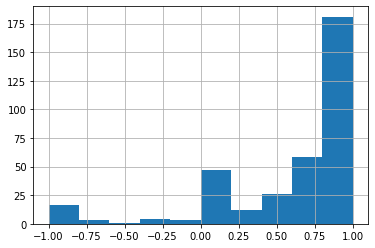

feature6


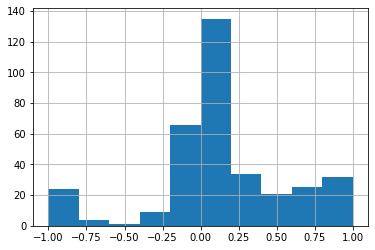

feature7


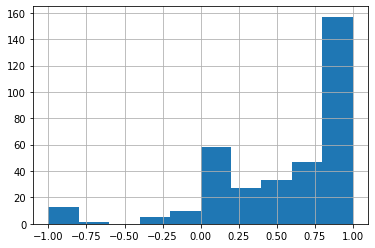

feature8


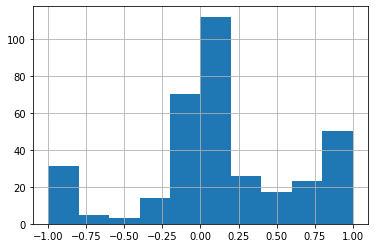

feature9


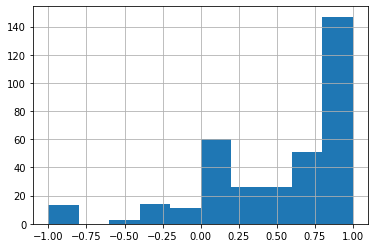

feature10


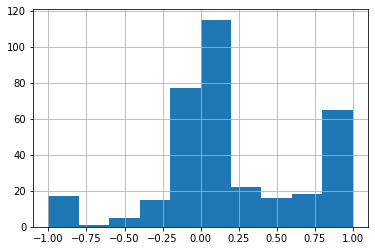

feature11


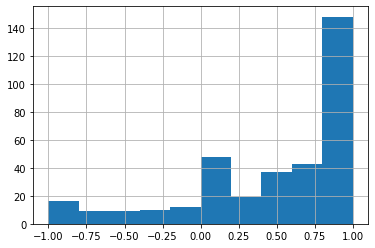

feature12


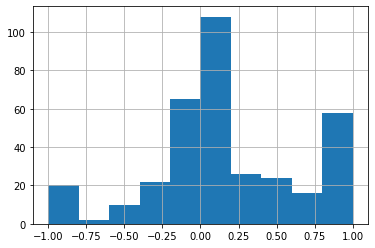

feature13


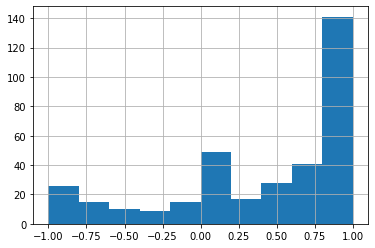

feature14


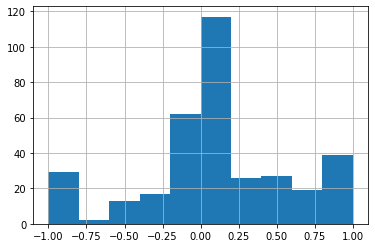

feature15


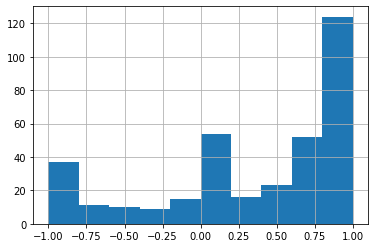

feature16


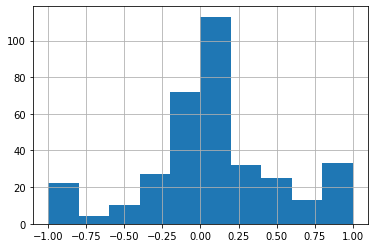

feature17


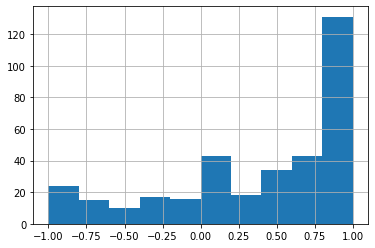

feature18


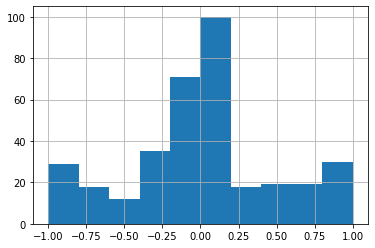

feature19


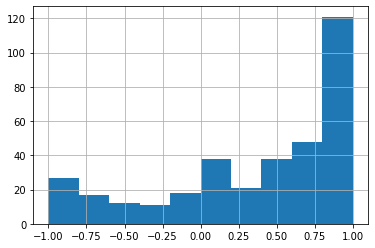

feature20


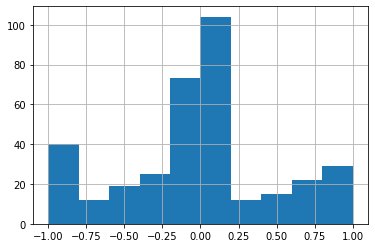

feature21


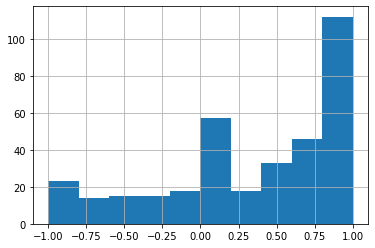

feature22


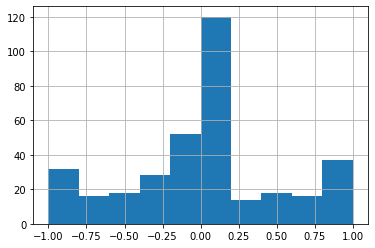

feature23


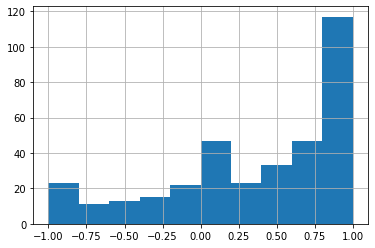

feature24


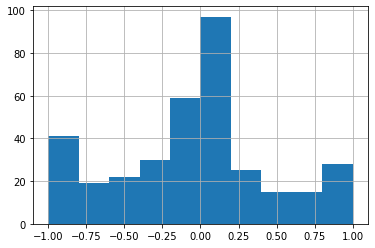

feature25


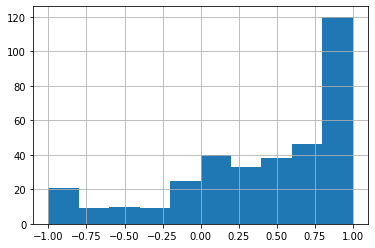

feature26


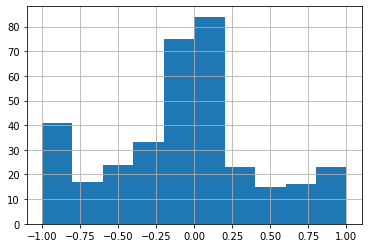

feature27


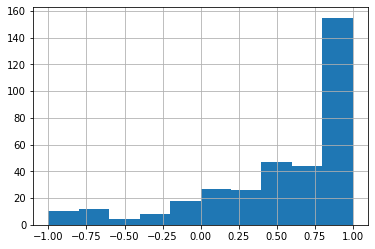

feature28


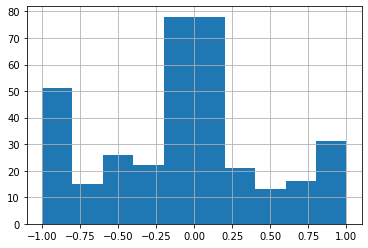

feature29


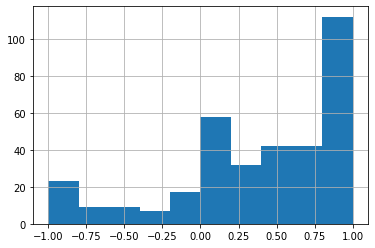

feature30


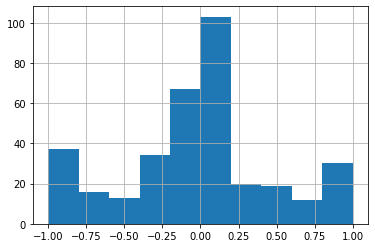

feature31


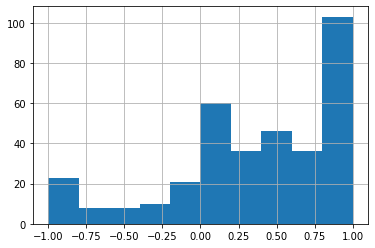

feature32


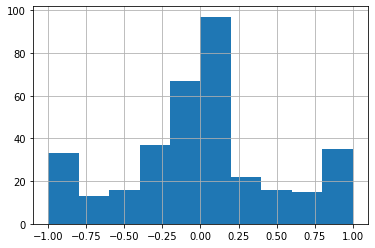

feature33


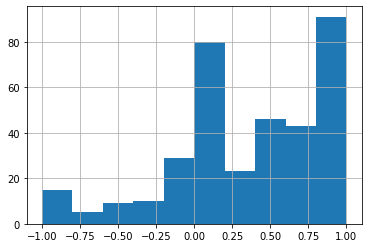

feature34


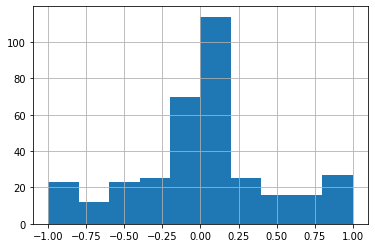

label


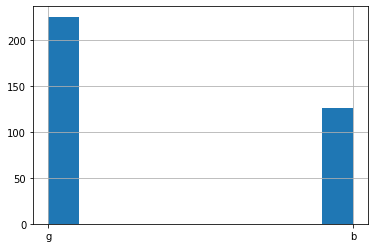

In [376]:

for feature in dataset:
    print(feature)
    dataset[feature].hist()
    plt.show()


#dataset.hist()
#plt.show()

In [377]:
#label encoding
dataset['label'] = [1 if lbl == 'g' else 0 for lbl in dataset['label']]

'''
count_1 = 0
count_0 = 0
for i, lbl in enumerate(dataset['label']):
    if lbl == 'g':
        dataset.iloc[i,-1] =1
        count_1 =+1
    else:
        dataset.iloc[i,-1] = 0
        count_0 =+1

print( count_1 )
print( count_0 )
'''
print( dataset["label"] )

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: label, Length: 351, dtype: int64


In [378]:
#f1 = np.array(dataset["feature1"])
#f1

In [379]:
#splitting into 60, 40
#shuffling

#train = dataset[:210] #not random 
#test = dataset[210:] #not random

train = dataset.sample(frac= 0.6)
#print("Train Index = ", train.index)
test = dataset.drop(train.index)
#print("Test Index = ", test.index)

train_data = train.iloc[:,0:-1]
train_labels = train.iloc[:,-1]
test_data = test.iloc[:,0:-1]
test_labels = test.iloc[:,-1]

#test_labels.head()

In [380]:
train_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
63,1,0.63816,1.00000,0.20833,-1.00000,1.00000,1.00000,0.87719,0.30921,-0.66886,...,0.80921,-1.00000,1.00000,-0.06140,1.00000,1.00000,0.20614,-1.00000,1.00000,1.00000
33,1,0.71253,-0.02595,0.41287,-0.23067,0.98019,-0.09473,0.99709,-0.10236,1.00000,...,0.65493,-0.20392,0.93124,-0.41307,0.63811,-0.21901,0.86136,-0.87354,-0.23186,-1.00000
111,1,0.86284,0.19310,0.80920,0.41149,0.67203,0.55785,0.54559,0.69962,0.36705,...,-0.59234,0.25747,-0.63038,0.08818,-0.57241,-0.07816,-0.54866,-0.19923,-0.42912,-0.31954
328,1,1.00000,0.51515,0.45455,0.33333,0.06061,0.36364,-0.32104,0.73062,-0.45455,...,1.00000,-0.39394,0.72961,0.12331,0.96970,0.57576,0.24242,0.36364,0.09091,0.33333
332,1,0.87578,0.03727,0.89951,0.00343,0.89210,0.00510,0.86335,0.00000,0.95031,...,0.79503,-0.04348,0.82111,0.02033,0.81988,0.08696,0.80757,0.02308,0.80088,0.02441


In [400]:
dataset.describe()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [401]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
feature1     351 non-null int64
feature3     351 non-null float64
feature4     351 non-null float64
feature5     351 non-null float64
feature6     351 non-null float64
feature7     351 non-null float64
feature8     351 non-null float64
feature9     351 non-null float64
feature10    351 non-null float64
feature11    351 non-null float64
feature12    351 non-null float64
feature13    351 non-null float64
feature14    351 non-null float64
feature15    351 non-null float64
feature16    351 non-null float64
feature17    351 non-null float64
feature18    351 non-null float64
feature19    351 non-null float64
feature20    351 non-null float64
feature21    351 non-null float64
feature22    351 non-null float64
feature23    351 non-null float64
feature24    351 non-null float64
feature25    351 non-null float64
feature26    351 non-null float64
feature27    351 non-null float64
feature28    

In [381]:
train_labels

63     0
33     0
111    1
328    1
332    1
      ..
288    1
159    1
58     1
84     1
271    1
Name: label, Length: 211, dtype: int64

In [382]:
#Normalization

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [383]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(211, 33)
(211,)
(140, 33)
(140,)


In [384]:
train_labels.sum()

143

In [385]:
len(train_labels)

211

In [386]:
#Data Preprocessing

train_data = train_data.to_numpy()
train_labels = train_labels.to_numpy().astype('float32')

test_data =test_data.to_numpy()
test_labels = test_labels.to_numpy().astype('float32')

In [387]:
print(type(train_data))
print(type(train_labels))
print(type(test_data))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [388]:
print(train_data.dtype)
print(train_labels.dtype)
print(test_data.dtype)
print(test_labels.dtype)

float64
float32
float64
float32


In [389]:
#model architecture - last layer activation function

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [390]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                544       
_________________________________________________________________
dense_35 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [391]:
#model compilation - loss and metrics

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [392]:
#model training - 100 epochs

history = model.fit(train_data, train_labels, validation_split=0.3, epochs=70, batch_size=25)

Train on 147 samples, validate on 64 samples
Epoch 1/70
147/147 [==============================] - 2s 16ms/sample - loss: 0.6801 - acc: 0.6939 - val_loss: 0.6756 - val_acc: 0.7031
Epoch 2/70
147/147 [==============================] - 0s 370us/sample - loss: 0.6165 - acc: 0.7347 - val_loss: 0.6333 - val_acc: 0.7500
Epoch 3/70
147/147 [==============================] - 0s 369us/sample - loss: 0.5746 - acc: 0.7755 - val_loss: 0.6002 - val_acc: 0.7656
Epoch 4/70
147/147 [==============================] - 0s 375us/sample - loss: 0.5392 - acc: 0.8095 - val_loss: 0.5692 - val_acc: 0.7500
Epoch 5/70
147/147 [==============================] - 0s 390us/sample - loss: 0.5085 - acc: 0.8231 - val_loss: 0.5432 - val_acc: 0.7656
Epoch 6/70
147/147 [==============================] - 0s 387us/sample - loss: 0.4808 - acc: 0.8367 - val_loss: 0.5185 - val_acc: 0.7656
Epoch 7/70
147/147 [==============================] - 0s 390us/sample - loss: 0.4562 - acc: 0.8367 - val_loss: 0.4951 - val_acc: 0.7656
Epoc

In [393]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

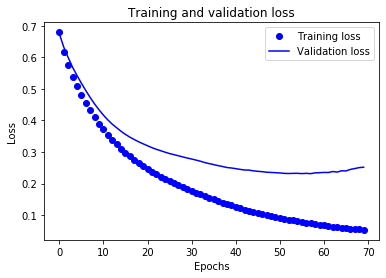

In [394]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(70)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

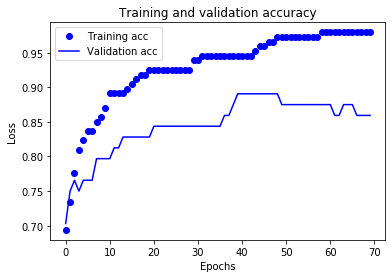

In [395]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [396]:
#evaluation

eval_score = model.evaluate(test_data, test_labels)

140/140 [==============================] - 0s 141us/sample - loss: 0.2192 - acc: 0.9071


In [397]:
eval_score

[0.21919914398874554, 0.9071429]

In [398]:
#prediction

pred_score = model.predict(test_data)
len(pred_score)
pred_score

array([[2.06325009e-01],
       [1.83610804e-02],
       [9.98373032e-01],
       [9.98958111e-01],
       [6.04209483e-01],
       [2.18145397e-05],
       [5.73783436e-05],
       [7.58933766e-07],
       [2.33392492e-01],
       [9.89199102e-01],
       [9.51736583e-05],
       [9.89044070e-01],
       [9.88834679e-01],
       [4.81343389e-01],
       [9.98032629e-01],
       [9.82615352e-01],
       [9.98710752e-01],
       [1.18753009e-01],
       [9.93928313e-01],
       [4.62083489e-01],
       [4.40382631e-03],
       [4.86495554e-01],
       [2.87067774e-03],
       [9.93914902e-01],
       [3.96143529e-04],
       [7.26496847e-03],
       [5.14954654e-03],
       [9.97894943e-01],
       [2.75069743e-01],
       [9.99122202e-01],
       [5.18924231e-03],
       [9.99105632e-01],
       [1.55024886e-01],
       [9.96896267e-01],
       [5.93752787e-02],
       [1.30058089e-02],
       [9.95211780e-01],
       [9.14226830e-01],
       [9.70314562e-01],
       [7.16568232e-01],


In [399]:
g_pred = (pred_score > 0.5)

print (tf.math.confusion_matrix(
    test_labels, g_pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
    ))

print ( np.count_nonzero(g_pred) )

tf.Tensor(
[[52  6]
 [ 7 75]], shape=(2, 2), dtype=int32)
81
